# **Image Compression**
Image compression is a type of data compression applied to digital images to reduce storage or transmission costs. algorithms,
It can take advantage of visual perception and statistical properties of image data to provide superior results compared to generic data compression methods used for other digital data.

The methods we will use:

-FFT (Fast Fourier Transform)

-DCT (Discrete Cosine Transform)

## *FFT (Fast Fourier Transform)*

In [ ]:
import pickle
from scipy.sparse import coo_matrix
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Orjinal')

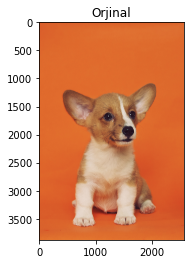

In [ ]:
dosya_ismi = 'kopek.jpg'
image = cv2.imread(dosya_ismi)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Orjinal')

Text(0.5, 1.0, 'Gri')

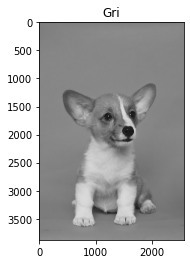

In [ ]:
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.title('Gri')

In [ ]:
filename = dosya_ismi+'-Gray.jpg'
cv2.imwrite(filename, img) 

True

In [ ]:
img.shape

(3876, 2568)

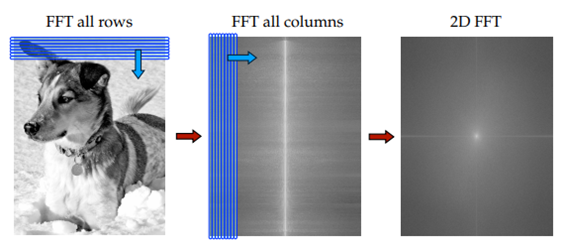

We apply FFT to the rows and columns of our image.

In [ ]:
img_t = np.fft.fft2(img)

Let's look at the fourier transform of the picture. The black ones in the middle are low frequency and the white ones are high frequency.

In [ ]:
def fourier_cizdir(fft):
  manyetik_spektrum = np.abs(fft)
  manyetik_spektrum[manyetik_spektrum < np.finfo(float).eps] = np.finfo(float).eps
  manyetik_spektrum = 20 * np.log(manyetik_spektrum)
  manyetik_spektrum = np.fft.fftshift(manyetik_spektrum)
  manyetik_spektrum = np.asarray(manyetik_spektrum,dtype=np.uint8)
  #plt.figure(num=None, figsize=(8, 6), dpi=80)
  plt.imshow(manyetik_spektrum,cmap='gray')

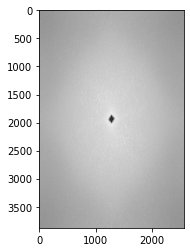

In [ ]:
fourier_cizdir(img_t)

We rank the Fourier coefficients that make up the actual pixels of the picture from largest to smallest.

In [ ]:
img_t_sort = np.sort(np.abs(img_t.reshape(-1)))

In [ ]:
img_t_sort      

array([9.47564723e-01, 9.47564723e-01, 4.46732753e+00, ...,
       4.43979843e+07, 4.43979843e+07, 1.35123194e+09])

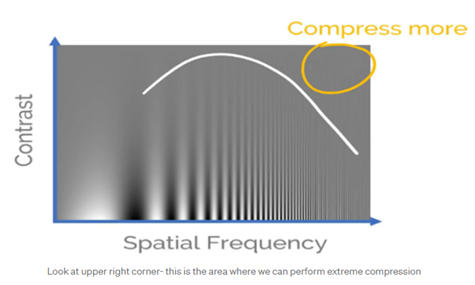

We'll take 10,5,1 and 2 percent of the Fourier coefficients, ordered from largest to smallest, and see the changes in the picture.

It's a little difficult to compress these pictures because there are so many high frequencies in hair, fur and grass.

coo_matrix :

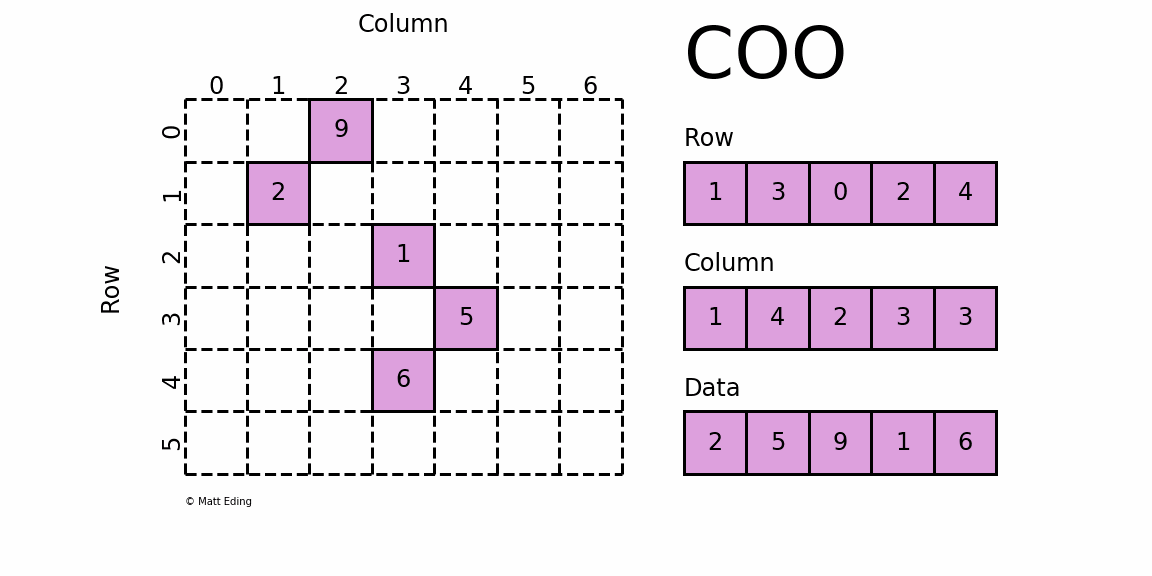

kopek.jpg-comp % 10.0.pkl = 23888.968  kb
OrjinalResim 79628.704  kb
Sıkıştırma oranı: 0.3000044807962717
kopek.jpg-comp % 5.0.pkl = 11944.696  kb
OrjinalResim 79628.704  kb
Sıkıştırma oranı: 0.15000490275466494
kopek.jpg-comp % 1.0.pkl = 2389.264  kb
OrjinalResim 79628.704  kb
Sıkıştırma oranı: 0.030005059482068174
kopek.jpg-comp % 0.02.pkl = 48.154  kb
OrjinalResim 79628.704  kb
Sıkıştırma oranı: 0.0006047316806763551


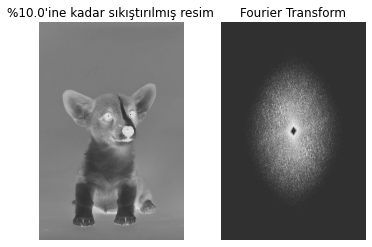

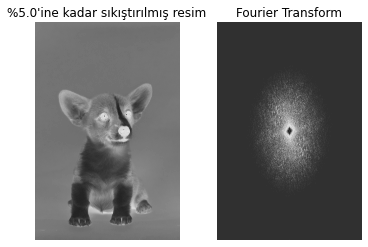

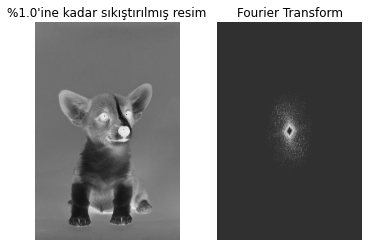

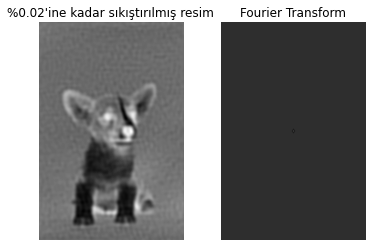

In [ ]:
pickle.dump(image.sum(axis=2), open('OrjinalResim.pkl', 'wb')) #Save the gray scale of the picture to the pickle file
def fft_comp(img_t,img_t_sort,dosya_ismi='image'):
  yuzde = [0.1,0.05,0.01,0.0002] 
  for i in yuzde:
    esik_deger = img_t_sort[int(np.floor((1-i)*len(img_t_sort)))] # Selects the percentile with (1-i), finds the index by multiplying by the length of the vector, and converts the number in it
    indeksler = np.abs(img_t) > esik_deger #We choose the ones that are greater than the threshold value found.
    sifirlama = img_t * indeksler #We reset values ​​that are less than the threshold value

    #We save the reset list as pickle file with coo_matrix
    comp = os.path.join(dosya_ismi+"-comp % "+str(i*100)+".pkl")
    pickle.dump(coo_matrix(sifirlama), open(comp, 'wb'))#coo_matrix takes non-0 values ​​and row column values. When it backs up, it fills the rest with 0.
    size_1 = os.path.getsize(comp)
    print(comp,"=",size_1/1000," kb")

    #We read the compressed list
    dbfile = open(comp, 'rb')     
    db = pickle.load(dbfile)
    dbfile.close()

    #We are trying to create the original image with reverse fft.
    ters_fft = np.fft.ifft2(db.todense()) #We do the Inverse Fourier Transform
    
    size_2 = os.path.getsize('OrjinalResim.pkl')
    print("OrjinalResim",size_2/1000," kb")

    #We save the picture we brought back.
    filename = dosya_ismi+str(i)+'.jpg'
    cv2.imwrite(filename, ters_fft.real) 

    #We draw the picture we brought back and its spectrum.
    fig = plt.figure()
    plt.subplot(1,2,1) 
    plt.imshow(256-ters_fft.real,cmap='gray')
    plt.axis('off')
    plt.title("%"+str(i*100)+"'ine kadar sıkıştırılmış resim")
    plt.subplot(1,2,2)
    fourier_cizdir(db.todense())
    plt.axis('off')
    plt.title('Fourier Transform')
    print("Sıkıştırma oranı:",str(size_1/size_2))

fft_comp(img_t,img_t_sort,dosya_ismi)

### 2.Example

Text(0.5, 1.0, 'Orjinal')

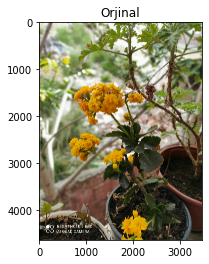

In [ ]:
dosya_ismi = 'cicek.jpg'
image_2 = cv2.imread(dosya_ismi)
plt.imshow(cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB))
plt.title('Orjinal')

Text(0.5, 1.0, 'Gri')

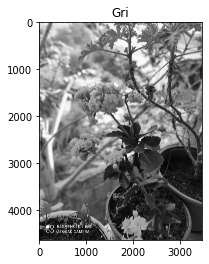

In [ ]:
img_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_GRAY2RGB))
plt.title('Gri')

In [ ]:
filename = dosya_ismi+'-Gray.jpg'
cv2.imwrite(filename, img_2) 

True

In [ ]:
img_t2 = np.fft.fft2(img_2)

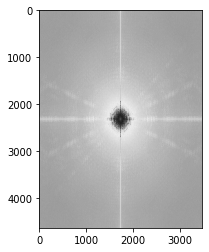

In [ ]:
fourier_cizdir(img_t2)

In [ ]:
img_t_sort2 = np.sort(np.abs(img_t2.reshape(-1)))

cicek.jpg-comp % 10.0.pkl = 38664.592  kb
OrjinalResim 128880.8  kb
Sıkıştırma oranı: 0.3000027312058895
cicek.jpg-comp % 5.0.pkl = 19332.472  kb
OrjinalResim 128880.8  kb
Sıkıştırma oranı: 0.15000273120588947
cicek.jpg-comp % 1.0.pkl = 3866.824  kb
OrjinalResim 128880.8  kb
Sıkıştırma oranı: 0.03000310364305622
cicek.jpg-comp % 0.02.pkl = 77.722  kb
OrjinalResim 128880.8  kb
Sıkıştırma oranı: 0.0006030533640387087


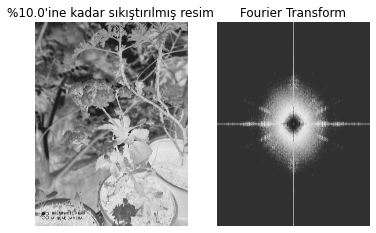

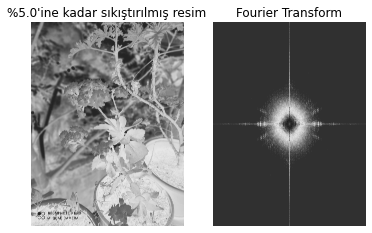

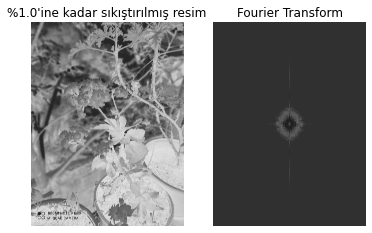

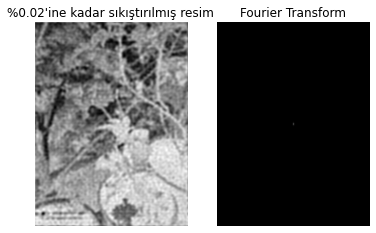

In [ ]:
pickle.dump(image_2.sum(axis=2), open('OrjinalResim.pkl', 'wb'))
fft_comp(img_t2,img_t_sort2,dosya_ismi)

## *DCT (Discrete Cosine Transform)*

In [ ]:
#Required library for huffman coding
!pip install dahuffman

Text(0.5, 1.0, 'Orjinal')

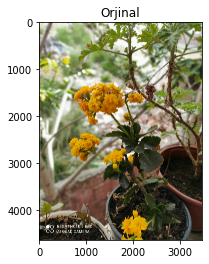

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

im = cv2.imread('cicek.jpg')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.title('Orjinal')

Text(0.5, 1.0, 'YCrCb')

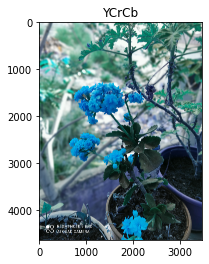

In [ ]:
imgYCC = cv2.cvtColor(im, cv2.COLOR_BGR2YCR_CB)
plt.imshow(cv2.cvtColor(imgYCC, cv2.COLOR_YCR_CB2BGR))
plt.title('YCrCb')

Text(0.5, 1.0, 'Gri')

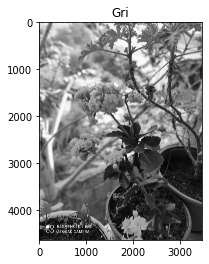

In [ ]:
img_2 = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_GRAY2RGB))
plt.title('Gri')

In [ ]:
img_t = np.fft.fft2(img_2)

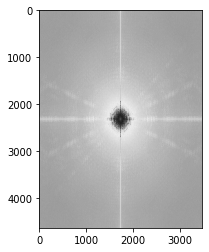

In [ ]:
fourier_cizdir(img_t)

When we convert from RGB to YCbCr, we see that it is divided into 3 channels.

These are Y: Luminosity Cr=Red component Cb=Blue component

In [ ]:
imgYCC.shape

(4640, 3472, 3)

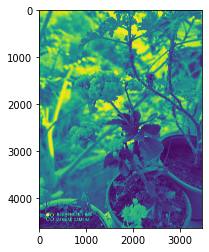

In [ ]:
plt.imshow(imgYCC[:,:,0])

Let's define our Quantization matrix.

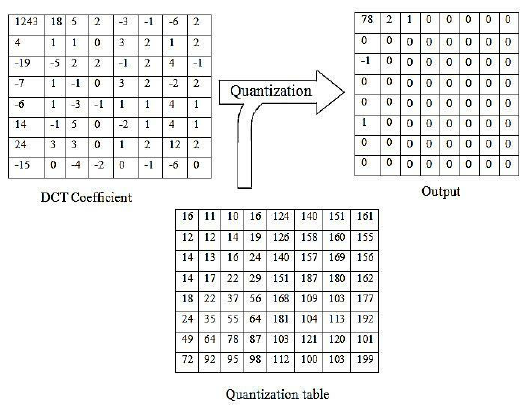

In [ ]:
#Let's define the quantization table
Q = [[16,11,10,16,24,40,51,61],
     [12,12,14,19,26,58,60,55],
     [14,13,16,24,40,57,69,56],
     [14,17,22,29,51,87,80,62],
     [18,22,37,56,68,109,103,77],
     [24,35,55,64,81,104,113,92],
     [49,64,78,87,103,121,120,101],
     [72,92,95,98,112,100,103,99]]
print("Niceleme Matrisi:")
for i in Q:
    print(i)

Niceleme Matrisi:
[16, 11, 10, 16, 24, 40, 51, 61]
[12, 12, 14, 19, 26, 58, 60, 55]
[14, 13, 16, 24, 40, 57, 69, 56]
[14, 17, 22, 29, 51, 87, 80, 62]
[18, 22, 37, 56, 68, 109, 103, 77]
[24, 35, 55, 64, 81, 104, 113, 92]
[49, 64, 78, 87, 103, 121, 120, 101]
[72, 92, 95, 98, 112, 100, 103, 99]


Let's select the luminous pixels of the picture.

In [ ]:
p = imgYCC[:,:,0]

In [ ]:
p.shape

(4640, 3472)

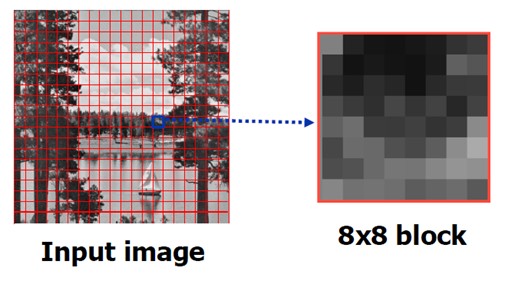

We divide our image into 8x8 blocks and shift each pixel by 128 because we will use DCT. Because the cosine is in the range of -1.1, we shift the pixels to the range of -128,128.

In [ ]:
p_yeni = []
kolon = len(p)
satir = len(p[0])
kaydırma = 8
su_anki_y = 0
for i in range(kaydırma,kolon+1,kaydırma):
  su_anki_x = 0
  for j in range(kaydırma,satir+1,kaydırma):
    p_yeni.append(p[su_anki_y:i,su_anki_x:j]-np.ones((8,8))*128)#8x8 bloğu seçeiz ve 128 kaydırırız.
    su_anki_x = j
  su_anki_y = i

In [ ]:
p_32 = [np.float32(i) for i in p_yeni]

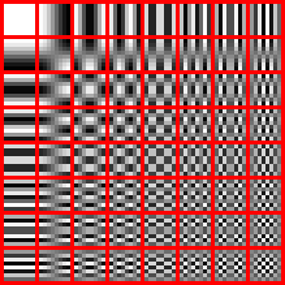

We apply DCT to 8x8 blocks.

In [ ]:
p_dct = []
for blok in p_32:
  dctt = cv2.dct(blok)
  p_dct.append(dctt)
p_dct[555]

array([[-1.9750000e+01, -1.3039511e+01,  2.4614124e+00, -3.5151482e-01,
         1.0536712e-08, -1.3085965e+00,  6.2841803e-02,  1.0082169e-01],
       [-1.7859419e+01, -1.4860959e+00, -1.0933339e-02, -1.8261930e+00,
         2.2293904e-01,  8.5537806e-02,  1.4580745e-01,  1.0426120e-01],
       [ 9.7992212e-01,  2.8227875e+00, -1.2499999e-01,  4.8665026e-01,
        -1.1152213e+00, -1.4903951e-01,  5.1776696e-02,  1.5947253e-01],
       [-9.9126565e-01, -2.3589396e+00, -4.1696671e-01, -1.2755725e-01,
         2.2087302e+00, -3.7670869e-01, -4.3811187e-01, -1.1686901e-01],
       [ 7.5000077e-01, -6.1669268e-02, -1.8081307e+00, -2.0061131e+00,
        -1.0536712e-08, -1.6354588e-01,  2.0775622e-01,  2.6449776e-01],
       [ 5.5545741e-01,  2.3298562e-01,  1.4555043e+00,  5.0068140e-02,
        -3.6468577e-01, -3.4211266e-01,  6.5568072e-01,  1.2849718e-01],
       [ 4.0589651e-01,  2.1157684e+00,  3.0177668e-01,  6.1116076e-01,
        -7.9256296e-02,  4.4206557e-01, -1.2500000e-01,  4

We divide each DCT-applied block with the Quantiation matrix.

In [ ]:
sa = 0 
for blok in p_dct:
  if sa == 555:
    print("blokilk:",blok)
  for i in range(8):
    for j in range(8):
      blok[i,j] = np.around(blok[i,j]/Q[i][j])
  if sa == 555:
    print("blokson:",blok)
  sa = sa + 1

blokilk: [[-1.9750000e+01 -1.3039511e+01  2.4614124e+00 -3.5151482e-01
   1.0536712e-08 -1.3085965e+00  6.2841803e-02  1.0082169e-01]
 [-1.7859419e+01 -1.4860959e+00 -1.0933339e-02 -1.8261930e+00
   2.2293904e-01  8.5537806e-02  1.4580745e-01  1.0426120e-01]
 [ 9.7992212e-01  2.8227875e+00 -1.2499999e-01  4.8665026e-01
  -1.1152213e+00 -1.4903951e-01  5.1776696e-02  1.5947253e-01]
 [-9.9126565e-01 -2.3589396e+00 -4.1696671e-01 -1.2755725e-01
   2.2087302e+00 -3.7670869e-01 -4.3811187e-01 -1.1686901e-01]
 [ 7.5000077e-01 -6.1669268e-02 -1.8081307e+00 -2.0061131e+00
  -1.0536712e-08 -1.6354588e-01  2.0775622e-01  2.6449776e-01]
 [ 5.5545741e-01  2.3298562e-01  1.4555043e+00  5.0068140e-02
  -3.6468577e-01 -3.4211266e-01  6.5568072e-01  1.2849718e-01]
 [ 4.0589651e-01  2.1157684e+00  3.0177668e-01  6.1116076e-01
  -7.9256296e-02  4.4206557e-01 -1.2500000e-01  4.4942284e-01]
 [ 3.3006668e-03  3.1037778e-02  5.4965831e-02 -7.2974712e-02
  -4.3452591e-01  5.7690416e-02  2.4776167e-01 -4.4234

### Huffman Coding

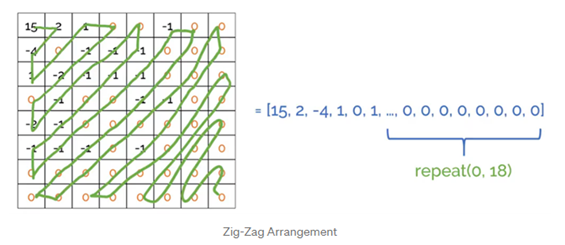

In [ ]:
#The zigzag function is applied to all columns.
listemiz = []
for blok in p_dct:
  blok = zigzag(blok)
  for i in range(64):
    listemiz.append(blok[i])

In [ ]:
import scipy.io
from collections import Counter
a=np.asarray(listemiz)

b=Counter(listemiz) #How many of each element do we get?
G=list(b.values()) #Returns how many numbers there are
o=list(b.keys()) #Returns which numbers they are.
print(b)
print(G)   
print(len(o))

Counter({0.0: 15185871, 1.0: 211259, -1.0: 201458, 2.0: 63593, -2.0: 59852, 3.0: 30557, -3.0: 29372, 4.0: 17517, -4.0: 16861, 5.0: 11635, -5.0: 11356, -6.0: 8461, 6.0: 8437, 7.0: 6491, -7.0: 6485, -8.0: 5657, 8.0: 5372, -9.0: 4847, -10.0: 4550, 9.0: 4408, -12.0: 4209, -11.0: 4168, 10.0: 4037, -13.0: 4026, -14.0: 3833, -16.0: 3713, -15.0: 3709, 11.0: 3666, -18.0: 3500, 12.0: 3450, -17.0: 3443, -19.0: 3339, -20.0: 3217, 13.0: 3161, 14.0: 3129, 61.0: 3034, -48.0: 2961, 16.0: 2949, -55.0: 2947, 15.0: 2917, -56.0: 2912, -21.0: 2879, 18.0: 2868, -54.0: 2854, 17.0: 2815, -47.0: 2795, -49.0: 2781, -50.0: 2717, -52.0: 2716, -46.0: 2710, -53.0: 2706, 19.0: 2667, -22.0: 2551, 20.0: 2550, -45.0: 2540, -23.0: 2517, -51.0: 2472, -44.0: 2455, -57.0: 2448, 21.0: 2366, -25.0: 2329, -24.0: 2288, -27.0: 2254, -43.0: 2248, 22.0: 2227, 23.0: 2189, -26.0: 2171, -42.0: 2171, -28.0: 2089, -29.0: 2049, -41.0: 2048, -58.0: 2020, -40.0: 1979, 24.0: 1902, 25.0: 1891, -36.0: 1832, -30.0: 1812, -38.0: 1809, -39.0: 

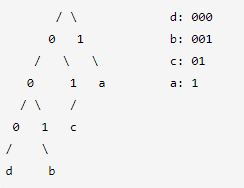

The Huffman algorithm is based on the logic of representing the more common symbols in a dataset with a lower length code, and the less common symbols with a higher length code.

In [ ]:
from dahuffman import HuffmanCodec
codec = HuffmanCodec.from_frequencies(b)

encoded = codec.encode(listemiz)
print(encoded)
print(len(encoded))
#print(codec.print_code_table())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
if codec.decode(encoded)==listemiz:
  print("yes")

yes


In [ ]:
comp = os.path.join("encoded.pkl")
pickle.dump(encoded, open(comp, 'wb'))
size = os.path.getsize(comp)
print(comp,"=",size/1000," kb",len(encoded))

encoded.pkl = 2550.732  kb 2550722


In [ ]:
comp = os.path.join("listemiz.pkl")
pickle.dump(listemiz, open(comp, 'wb'))
size = os.path.getsize(comp)
print(comp,"=",size/1000," kb",len(listemiz))

listemiz.pkl = 499444.054  kb 16110080


In [ ]:
print("Sıkıştırma oranı =",(os.path.getsize("encoded.pkl")/1000)/(os.path.getsize("listemiz.pkl")/1000))

Sıkıştırma oranı = 0.005107142590989781


In [ ]:
dbfile = open('encoded.pkl', 'rb')     
db = pickle.load(dbfile)
dbfile.close()

In [ ]:
decoded = codec.decode(db)

In [ ]:
len(decoded)

16110080

In [ ]:
geri_listemiz = []
for i in range(0,len(decoded),64):
  arr = np.array(inverse_zigzag(decoded[i:i+64],8,8))
  geri_listemiz.append(np.reshape(arr, (8, 8)))

In [ ]:
len(geri_listemiz)

251720

### DCT continue

We apply idct to dct applied blocks to get the picture back.

In [ ]:
invList = []
for ipart in geri_listemiz:
    curriDCT = cv2.idct(ipart)
    invList.append(curriDCT)
invList[0][0]

array([7.125, 7.125, 7.125, 7.125, 7.125, 7.125, 7.125, 7.125])

We get the picture by combining 8x8 blocks.

In [ ]:
row = 0
rowNcol = []
for j in range(int(satir/kaydırma),len(invList)+1,int(satir/kaydırma)):
    rowNcol.append(np.hstack((invList[row:j])))
    row = j
res = np.vstack((rowNcol))

Text(0.5, 1.0, 'Orjinal Resim')

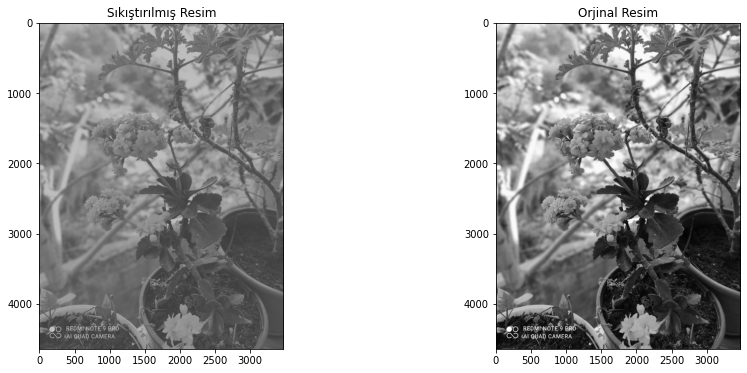

In [ ]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1) 
plt.imshow(res,cmap='gray')
plt.title('Sıkıştırılmış Resim')
plt.subplot(1,2,2) 
img_gri = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_gri, cv2.COLOR_GRAY2RGB))
plt.title('Orjinal Resim')

In [ ]:
img_t2 = np.fft.fft2(res)

Text(0.5, 1.0, 'Orjinal Resmin Spektrumu')

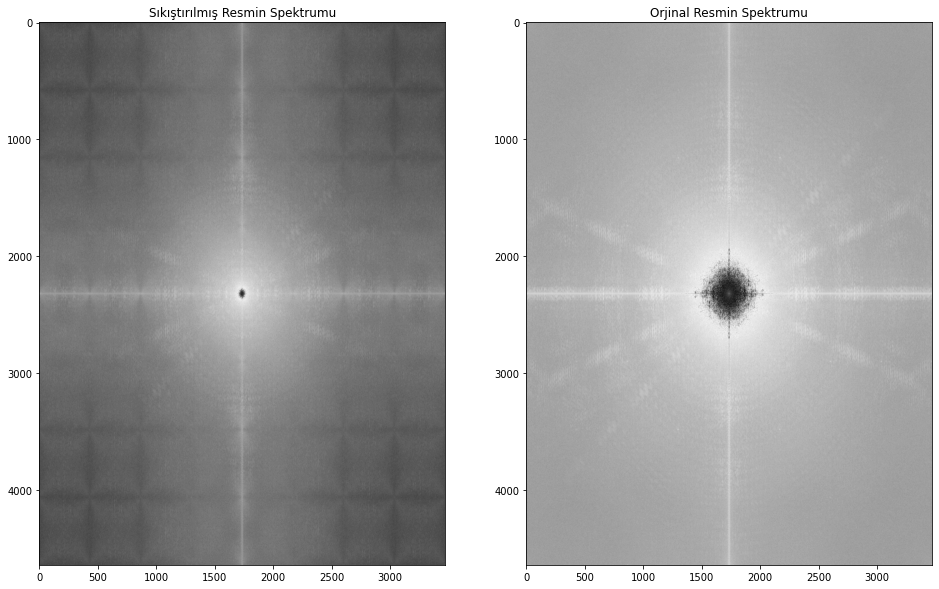

In [ ]:
manyetik_spektrum_2 = 20 * np.log(np.abs(img_t2))
manyetik_spektrum_2 = np.fft.fftshift(manyetik_spektrum_2)
manyetik_spektrum_2 = np.asarray(manyetik_spektrum_2,dtype=np.uint8)
fig = plt.figure(figsize=(16,12))
plt.subplot(1,2,1) 
plt.imshow(manyetik_spektrum_2,cmap='gray')
plt.title('Sıkıştırılmış Resmin Spektrumu')
plt.subplot(1,2,2) 
fourier_cizdir(img_t)
plt.title('Orjinal Resmin Spektrumu')

### Functions for zigzag in matrix

Source Code zigzag functions : https://github.com/getsanjeev/compression-DCT/blob/master/zigzag.py

In [ ]:
def zigzag(input):
    #initializing the variables
    #----------------------------------
    h = 0
    v = 0

    vmin = 0
    hmin = 0

    vmax = input.shape[0]
    hmax = input.shape[1]
    
    #print(vmax ,hmax )

    i = 0

    output = np.zeros(( vmax * hmax))
    #----------------------------------

    while ((v < vmax) and (h < hmax)):
    	
        if ((h + v) % 2) == 0:                 # going up
            
            if (v == vmin):
            	#print(1)
                output[i] = input[v, h]        # if we got to the first line

                if (h == hmax):
                    v = v + 1
                else:
                    h = h + 1                        

                i = i + 1

            elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
            	#print(2)
            	output[i] = input[v, h] 
            	v = v + 1
            	i = i + 1

            elif ((v > vmin) and (h < hmax -1 )):    # all other cases
            	#print(3)
            	output[i] = input[v, h] 
            	v = v - 1
            	h = h + 1
            	i = i + 1

        
        else:                                    # going down

        	if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
        		#print(4)
        		output[i] = input[v, h] 
        		h = h + 1
        		i = i + 1
        
        	elif (h == hmin):                  # if we got to the first column
        		#print(5)
        		output[i] = input[v, h] 

        		if (v == vmax -1):
        			h = h + 1
        		else:
        			v = v + 1

        		i = i + 1

        	elif ((v < vmax -1) and (h > hmin)):     # all other cases
        		#print(6)
        		output[i] = input[v, h] 
        		v = v + 1
        		h = h - 1
        		i = i + 1




        if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
        	#print(7)        	
        	output[i] = input[v, h] 
        	break

    #print ('v:',v,', h:',h,', i:',i)
    return output

In [ ]:
def inverse_zigzag(input, vmax, hmax):
	
	# initializing the variables
	#----------------------------------
	h = 0
	v = 0

	vmin = 0
	hmin = 0

	output = np.zeros((vmax, hmax))

	i = 0
    #----------------------------------

	while ((v < vmax) and (h < hmax)): 
		#print ('v:',v,', h:',h,', i:',i)   	
		if ((h + v) % 2) == 0:                 # going up
            
			if (v == vmin):
				#print(1)
				
				output[v, h] = input[i]        # if we got to the first line

				if (h == hmax):
					v = v + 1
				else:
					h = h + 1                        

				i = i + 1

			elif ((h == hmax -1 ) and (v < vmax)):   # if we got to the last column
				#print(2)
				output[v, h] = input[i] 
				v = v + 1
				i = i + 1

			elif ((v > vmin) and (h < hmax -1 )):    # all other cases
				#print(3)
				output[v, h] = input[i] 
				v = v - 1
				h = h + 1
				i = i + 1

        
		else:                                    # going down

			if ((v == vmax -1) and (h <= hmax -1)):       # if we got to the last line
				#print(4)
				output[v, h] = input[i] 
				h = h + 1
				i = i + 1
        
			elif (h == hmin):                  # if we got to the first column
				#print(5)
				output[v, h] = input[i] 
				if (v == vmax -1):
					h = h + 1
				else:
					v = v + 1
				i = i + 1
        		        		
			elif((v < vmax -1) and (h > hmin)):     # all other cases
				output[v, h] = input[i] 
				v = v + 1
				h = h - 1
				i = i + 1




		if ((v == vmax-1) and (h == hmax-1)):          # bottom right element
			#print(7)        	
			output[v, h] = input[i] 
			break


	return output